SETUP

In [1]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
import qkeras
from qkeras import *

In [2]:
X_40x192 = np.load("/Users/jackcleeve/Desktop/bnb_WithWire_00_batch_00_40X192.npy")

In [3]:
X_40x192.shape

(491520, 18, 16, 1)

In [4]:
from qkeras.utils import _add_supported_quantized_objects
co = {}
_add_supported_quantized_objects(co)

In [5]:
#model = keras.models.load_model("noQDB_seq", custom_objects=co)
teacher = keras.models.load_model('/Users/jackcleeve/Desktop/Research/Karagiorgi-Lab/Cicada_Models/teacher_tiles40X192_sample')
c4_model = qkeras.utils.load_qmodel('/Users/jackcleeve/Desktop/Research/Karagiorgi-Lab/Cicada_Models/Cicada4_tiles40X192_sample')
c3_model = qkeras.utils.load_qmodel('/Users/jackcleeve/Desktop/Research/Karagiorgi-Lab/Cicada_Models/Cicada3_seq_tiles40X192_sample')
cqd_model = qkeras.utils.load_qmodel('/Users/jackcleeve/Desktop/Research/Karagiorgi-Lab/Cicada_Models/Cicada_QDense_seq_tiles40X192_sample')

In [6]:
import hls4ml
import QDenseBatchnorm


In [7]:
cqd_config = hls4ml.utils.config_from_keras_model(cqd_model, backend='Vitis', 
                                              default_precision='fixed<32,16>',
                                              granularity='name')

Interpreting Sequential
Topology:
Layer name: reshape_input, layer type: InputLayer, input shapes: [[None, 288]], output shape: [None, 288]
Layer name: reshape, layer type: Reshape, input shapes: [[None, 288]], output shape: [None, 18, 16, 1]
Layer name: conv, layer type: QConv2D, input shapes: [[None, 18, 16, 1]], output shape: [None, 9, 8, 4]
Layer name: relu0, layer type: Activation, input shapes: [[None, 9, 8, 4]], output shape: [None, 9, 8, 4]
Layer name: flatten, layer type: Reshape, input shapes: [[None, 9, 8, 4]], output shape: [None, 288]
Layer name: dense1, layer type: QDenseBatchnorm, input shapes: [[None, 288]], output shape: [None, 16]
Layer name: relu1, layer type: Activation, input shapes: [[None, 16]], output shape: [None, 16]
Layer name: dense2, layer type: QDense, input shapes: [[None, 16]], output shape: [None, 1]
Layer name: outputs, layer type: Activation, input shapes: [[None, 1]], output shape: [None, 1]


/Users/jackcleeve/anaconda3/envs/fastml310/lib/python3.10/site-packages/keras/src/constraints.py:365: UserWarning: The `keras.constraints.serialize()` API should only be used for objects of type `keras.constraints.Constraint`. Found an instance of type <class 'qkeras.quantizers.quantized_bits'>, which may lead to improper serialization.
  warnings.warn(


In [8]:
c4_config = hls4ml.utils.config_from_keras_model(c4_model, backend='Vitis', 
                                              default_precision='fixed<32,16>',
                                              granularity='name')

Interpreting Model
Topology:
Layer name: inputs_, layer type: InputLayer, input shapes: [[None, 288]], output shape: [None, 288]
Layer name: reshape, layer type: Reshape, input shapes: [[None, 288]], output shape: [None, 18, 16, 1]
Layer name: conv, layer type: QConv2D, input shapes: [[None, 18, 16, 1]], output shape: [None, 9, 8, 4]
Layer name: relu0, layer type: Activation, input shapes: [[None, 9, 8, 4]], output shape: [None, 9, 8, 4]
Layer name: flatten, layer type: Reshape, input shapes: [[None, 9, 8, 4]], output shape: [None, 288]
Layer name: dense1, layer type: QDense, input shapes: [[None, 288]], output shape: [None, 16]
Layer name: relu1, layer type: Activation, input shapes: [[None, 16]], output shape: [None, 16]
Layer name: dense2, layer type: QDense, input shapes: [[None, 16]], output shape: [None, 1]
Layer name: outputs, layer type: Activation, input shapes: [[None, 1]], output shape: [None, 1]


In [9]:
c3_config = hls4ml.utils.config_from_keras_model(c3_model, backend='Vitis', 
                                              default_precision='fixed<32,16>',
                                              granularity='name')

Interpreting Sequential
Topology:
Layer name: inputs_, layer type: InputLayer, input shapes: [[None, 288]], output shape: [None, 288]
Layer name: reshape, layer type: Reshape, input shapes: [[None, 288]], output shape: [None, 18, 16, 1]
Layer name: conv, layer type: QConv2D, input shapes: [[None, 18, 16, 1]], output shape: [None, 9, 8, 4]
Layer name: relu0, layer type: Activation, input shapes: [[None, 9, 8, 4]], output shape: [None, 9, 8, 4]
Layer name: flatten, layer type: Reshape, input shapes: [[None, 9, 8, 4]], output shape: [None, 288]
Layer name: dense1, layer type: QDense, input shapes: [[None, 288]], output shape: [None, 16]
Layer name: relu1, layer type: Activation, input shapes: [[None, 16]], output shape: [None, 16]
Layer name: dense2, layer type: QDense, input shapes: [[None, 16]], output shape: [None, 1]
Layer name: outputs, layer type: Activation, input shapes: [[None, 1]], output shape: [None, 1]


In [10]:
hls_model_cqd = hls4ml.converters.convert_from_keras_model(cqd_model,
                                                       hls_config=cqd_config,
                                                       io_type='io_parallel',
                                                       output_dir=f'cicada_qd_40x192_hls4mlproj')

Interpreting Sequential
Topology:
Layer name: reshape_input, layer type: InputLayer, input shapes: [[None, 288]], output shape: [None, 288]
Layer name: reshape, layer type: Reshape, input shapes: [[None, 288]], output shape: [None, 18, 16, 1]
Layer name: conv, layer type: QConv2D, input shapes: [[None, 18, 16, 1]], output shape: [None, 9, 8, 4]
Layer name: relu0, layer type: Activation, input shapes: [[None, 9, 8, 4]], output shape: [None, 9, 8, 4]
Layer name: flatten, layer type: Reshape, input shapes: [[None, 9, 8, 4]], output shape: [None, 288]
Layer name: dense1, layer type: QDenseBatchnorm, input shapes: [[None, 288]], output shape: [None, 16]
Layer name: relu1, layer type: Activation, input shapes: [[None, 16]], output shape: [None, 16]
Layer name: dense2, layer type: QDense, input shapes: [[None, 16]], output shape: [None, 1]
Layer name: outputs, layer type: Activation, input shapes: [[None, 1]], output shape: [None, 1]
Creating HLS model


In [11]:
hls_model_c4 = hls4ml.converters.convert_from_keras_model(c4_model,
                                                       hls_config=c4_config,
                                                       io_type='io_parallel',
                                                       output_dir=f'cicada4_40x192_hls4mlproj')

Interpreting Model
Topology:
Layer name: inputs_, layer type: InputLayer, input shapes: [[None, 288]], output shape: [None, 288]
Layer name: reshape, layer type: Reshape, input shapes: [[None, 288]], output shape: [None, 18, 16, 1]
Layer name: conv, layer type: QConv2D, input shapes: [[None, 18, 16, 1]], output shape: [None, 9, 8, 4]
Layer name: relu0, layer type: Activation, input shapes: [[None, 9, 8, 4]], output shape: [None, 9, 8, 4]
Layer name: flatten, layer type: Reshape, input shapes: [[None, 9, 8, 4]], output shape: [None, 288]
Layer name: dense1, layer type: QDense, input shapes: [[None, 288]], output shape: [None, 16]
Layer name: relu1, layer type: Activation, input shapes: [[None, 16]], output shape: [None, 16]
Layer name: dense2, layer type: QDense, input shapes: [[None, 16]], output shape: [None, 1]
Layer name: outputs, layer type: Activation, input shapes: [[None, 1]], output shape: [None, 1]
Creating HLS model


In [12]:
hls_model_c3 = hls4ml.converters.convert_from_keras_model(c3_model,
                                                       hls_config=c3_config,
                                                       io_type='io_parallel',
                                                       output_dir=f'cicada3_40x192_hls4mlproj')

Interpreting Sequential
Topology:
Layer name: inputs_, layer type: InputLayer, input shapes: [[None, 288]], output shape: [None, 288]
Layer name: reshape, layer type: Reshape, input shapes: [[None, 288]], output shape: [None, 18, 16, 1]
Layer name: conv, layer type: QConv2D, input shapes: [[None, 18, 16, 1]], output shape: [None, 9, 8, 4]
Layer name: relu0, layer type: Activation, input shapes: [[None, 9, 8, 4]], output shape: [None, 9, 8, 4]
Layer name: flatten, layer type: Reshape, input shapes: [[None, 9, 8, 4]], output shape: [None, 288]
Layer name: dense1, layer type: QDense, input shapes: [[None, 288]], output shape: [None, 16]
Layer name: relu1, layer type: Activation, input shapes: [[None, 16]], output shape: [None, 16]
Layer name: dense2, layer type: QDense, input shapes: [[None, 16]], output shape: [None, 1]
Layer name: outputs, layer type: Activation, input shapes: [[None, 1]], output shape: [None, 1]
Creating HLS model


In [14]:
X_flat = X_40x192.reshape((491520,-1))

In [15]:
X_flat.shape

(491520, 288)

In [16]:
def loss(y_true, y_pred, choice):
    if choice == 'mse':
        loss = np.mean((y_true - y_pred)**2, axis = (1,2,3))
        return loss

ntimeticks = 6400
nwire = 3456
f_downsample = 10
h_split = 10
v_split = 4
nbatch = 32

strategy = tf.distribute.MirroredStrategy()
print("Number of devices: {}".format(strategy.num_replicas_in_sync))

adccutoff = 10.*f_downsample/10.
adcsaturation = 100.*f_downsample/10.

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


Number of devices: 1


COMPILING AND PREDICTING

In [17]:
#Y = student_test.predict(X_flat)

X_predict_teacher = teacher.predict(X_40x192)
X_loss_teacher = loss(X_40x192, X_predict_teacher, 'mse')

Y_cqd = cqd_model.predict(X_flat).reshape(len(X_loss_teacher))
Y_c4 = c4_model.predict(X_flat).reshape(len(X_loss_teacher))
Y_c3 = c3_model.predict(X_flat).reshape(len(X_loss_teacher))


15360/15360 [==============================] - 8s 510us/step


In [18]:
hls_model_cqd.compile()
hls_model_c4.compile()
hls_model_c3.compile()

Writing HLS project
Done


/Users/jackcleeve/anaconda3/envs/fastml310/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/Users/jackcleeve/anaconda3/envs/fastml310/lib/python3.10/site-packages/keras/src/constraints.py:365: UserWarning: The `keras.constraints.serialize()` API should only be used for objects of type `keras.constraints.Constraint`. Found an instance of type <class 'qkeras.quantizers.quantized_bits'>, which may lead to improper serialization.
  warnings.warn(


Writing HLS project
Done
Writing HLS project
Done


In [19]:
Y_hls_cqd = hls_model_cqd.predict(X_flat).reshape(len(X_loss_teacher))

In [20]:
Y_hls_c4 = hls_model_c4.predict(X_flat).reshape(len(X_loss_teacher))

In [21]:
Y_hls_c3 = hls_model_c3.predict(X_flat).reshape(len(X_loss_teacher))

RESULTS

In [22]:
import matplotlib.pyplot as plt

In [23]:
y_hls_all = Y_hls_cqd+Y_hls_c4+Y_hls_c3

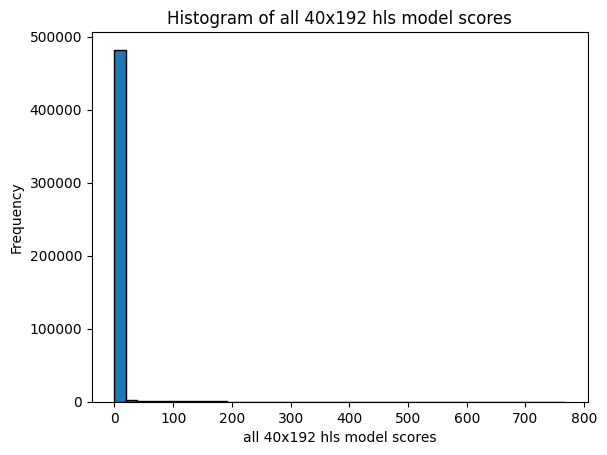

In [24]:
plt.hist(y_hls_all, bins=40, edgecolor='black')
plt.xlabel('all 40x192 hls model scores')
plt.ylabel('Frequency')
plt.title('Histogram of all 40x192 hls model scores')
plt.show()

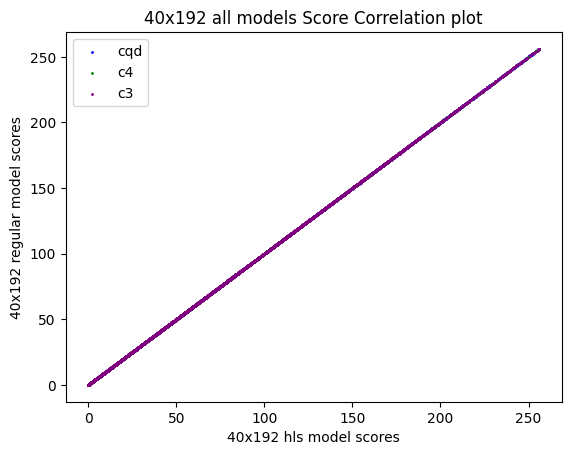

In [27]:
plt.scatter(Y_hls_cqd, Y_cqd, s=1, color="blue", label='cqd')
plt.scatter(Y_hls_c4, Y_c4, s=1, color="green", label="c4")
plt.scatter(Y_hls_c3, Y_c3, s=1, color="purple", label="c3")

plt.xlabel('40x192 hls model scores')
plt.ylabel('40x192 regular model scores')
plt.title('40x192 all models Score Correlation plot')
plt.legend()
plt.show()